<font size="5">Pitchfork Reviews Project: Preprocessing and Modeling<h1>

**Preprocessing**

In [341]:
#Import Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [202]:
#Import Data
original_df = pd.read_csv('data.csv')
original_df.head()

,author,artist,title,genre,date,review_abstract,score,page,target,year,month,self-titled,sophomore,EP,reading_ease,grade_level,word_count,high
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,1,medium,2020,September,0,0,0,56.59,11,23,0
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,1,medium,2020,September,0,0,0,64.71,8,30,0
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,1,high,2020,September,0,0,0,25.12,17,29,1
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,1,medium,2020,September,0,0,0,73.51,8,23,0
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,1,medium,2020,September,0,0,0,71.14,7,17,0


In [203]:
#Create dummies of categorical variables.
dummies_genre = pd.get_dummies(original_df['genre']).rename(columns=lambda x: 'genre_' + str(x))
dummies_target = pd.get_dummies(original_df['target']).rename(columns=lambda x: 'target_' + str(x))
dummies_year = pd.get_dummies(original_df['year']).rename(columns=lambda x: 'year_' + str(x))
dummies_month = pd.get_dummies(original_df['month']).rename(columns=lambda x: 'month_' + str(x))
dummies_grade_level = pd.get_dummies(original_df['grade_level']).rename(columns=lambda x: 'grade_level_' + str(x))

#Concatenate dummy variables into one dataframe.
df = pd.concat([original_df, dummies_genre, dummies_target, dummies_year, dummies_month, dummies_grade_level], axis=1)
df.head()

,author,artist,title,genre,date,review_abstract,score,page,target,year,...,grade_level_22,grade_level_23,grade_level_24,grade_level_25,grade_level_26,grade_level_27,grade_level_28,grade_level_29,grade_level_31,grade_level_32
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,1,medium,2020,...,0,0,0,0,0,0,0,0,0,0
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,1,medium,2020,...,0,0,0,0,0,0,0,0,0,0
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,1,high,2020,...,0,0,0,0,0,0,0,0,0,0
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,1,medium,2020,...,0,0,0,0,0,0,0,0,0,0
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,1,medium,2020,...,0,0,0,0,0,0,0,0,0,0


In [204]:
#Create dataframe for continuous variables.
num_cols = df[['reading_ease', 'word_count']]

In [205]:
#Transform continuous variable dataframe into array.
num_col_array = np.array(num_cols)

In [206]:
#Create scaler object.
scaler = StandardScaler()

#Fit scaler object to data.
nca_fitted = scaler.fit_transform(num_col_array)

In [207]:
#Transform fitted array into dataframe.
nca_df = pd.DataFrame(nca_fitted)

nca_df.head()

,0,1
0,0.341412,-0.761603
1,0.847959,-0.143450
2,-1.621769,-0.231757
3,1.396926,-0.761603
4,1.249079,-1.291448


In [208]:
#Rename variables
nca_df = nca_df.rename(columns={0:"reading_ease_scaled", 1:"word_count_scaled"})

In [209]:
#Concatenate dummy column dataframe with scaled dataframe
df = pd.concat([df, nca_df], axis=1)

In [210]:
#Drop non-scaled/preprocessed columns.
df = df.drop(['author', 'artist', 'title', 'genre', 'date', 'target','score', 'year', 'month', 'reading_ease', 'word_count', 'grade_level'], axis=1)
df.head()

,review_abstract,page,self-titled,sophomore,EP,high,genre_Electronic,genre_ElectronicExperimental,genre_ElectronicExperimentalFolk/Country,genre_ElectronicExperimentalPop/R&B,...,grade_level_24,grade_level_25,grade_level_26,grade_level_27,grade_level_28,grade_level_29,grade_level_31,grade_level_32,reading_ease_scaled,word_count_scaled
0,"After a string of misfires, the UK musician’s ...",1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.341412,-0.761603
1,The Swedish minimalist composer David Wenngren...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.847959,-0.143450
2,"On his latest solo record, the singer-songwrit...",1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.621769,-0.231757
3,The funky and hypnotic fourth album from the C...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.396926,-0.761603
4,The NYC rapper YL’s music is full of slice-of-...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.249079,-1.291448


Create text features dataframe

In [231]:
vectorizer = CountVectorizer(min_df = 29, stop_words = 'english')
features = vectorizer.fit_transform(df['review_abstract'])

In [232]:
count_vect_df = pd.DataFrame(features.todense(), columns=vectorizer.get_feature_names())

In [233]:
count_vect_df = count_vect_df.drop(columns=['10', '12', '13', '15', '16', '17', '19', 'high'])

In [234]:
df = pd.concat([df, count_vect_df], axis = 1)

In [236]:
df = df.drop(columns='page')

In [237]:
df.head()

,review_abstract,self-titled,sophomore,EP,high,genre_Electronic,genre_ElectronicExperimental,genre_ElectronicExperimentalFolk/Country,genre_ElectronicExperimentalPop/R&B,genre_ElectronicExperimentalRock,...,worth,writing,written,wrote,year,years,york,young,youth,zealand
0,"After a string of misfires, the UK musician’s ...",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,The Swedish minimalist composer David Wenngren...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"On his latest solo record, the singer-songwrit...",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The funky and hypnotic fourth album from the C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The NYC rapper YL’s music is full of slice-of-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Create X and y variables

In [238]:
X = df.drop(['high'], axis=1)
y = df['high']

In [239]:
df.head()

,review_abstract,self-titled,sophomore,EP,high,genre_Electronic,genre_ElectronicExperimental,genre_ElectronicExperimentalFolk/Country,genre_ElectronicExperimentalPop/R&B,genre_ElectronicExperimentalRock,...,worth,writing,written,wrote,year,years,york,young,youth,zealand
0,"After a string of misfires, the UK musician’s ...",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,The Swedish minimalist composer David Wenngren...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"On his latest solo record, the singer-songwrit...",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The funky and hypnotic fourth album from the C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The NYC rapper YL’s music is full of slice-of-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [240]:
#Drop score-related columns from X
X = X.drop(columns=['target_high', 'target_medium', 'target_low'])

In [241]:
X_abstract = X['review_abstract']

In [242]:
#Drop review_abstract from X
X = X.drop(columns=['review_abstract'], axis=1)

In [243]:
X.shape

(10568, 1317)

In [244]:
#Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [245]:
#Check for inbalance in y data.
unique, count = np.unique(y_train, return_counts=True)
y_train_dict = {k:v for(k,v) in zip(unique,count)}
y_train_dict

{0: 5932, 1: 1465}

In [246]:
X_train.head()

,self-titled,sophomore,EP,genre_Electronic,genre_ElectronicExperimental,genre_ElectronicExperimentalFolk/Country,genre_ElectronicExperimentalPop/R&B,genre_ElectronicExperimentalRock,genre_ElectronicFolk/Country,genre_ElectronicGlobal,...,worth,writing,written,wrote,year,years,york,young,youth,zealand
678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
836,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Model Creation**

Random Forest

In [247]:
base_rf = RandomForestClassifier()
base_rf.fit(X_train, y_train)
pred_rf = base_rf.predict(X_test)
print(accuracy_score(y_test, pred_rf))

0.8246609902239042


In [248]:
#Create and gridsearch a random forest model for the data.
clf = RandomForestClassifier()

parameters = {'n_estimators': [100], 
              'max_features': ['sqrt'], 
              'criterion': ['entropy'],
              'max_depth': [50], 
              'min_samples_split': [6],
              'min_samples_leaf': [1],
             }

roc_auc = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, parameters, scoring=roc_auc)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_split=6)

In [249]:
#Predict on model and get accuracy score
predictions_rf = clf.predict(X_test)
print(accuracy_score(y_test, predictions_rf))

0.8227688426363923


In [250]:
#Random forest confusion matrix
confusion_matrix(y_test, predictions_rf)

array([[2525,   24],
       [ 538,   84]], dtype=int64)

In [251]:
#Random forest classification report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2549
           1       0.78      0.14      0.23       622

    accuracy                           0.82      3171
   macro avg       0.80      0.56      0.56      3171
weighted avg       0.82      0.82      0.77      3171



Logistic Regression

In [252]:
base_lr = LogisticRegression()
base_lr.fit(X_test, y_test)
predictions_base = base_lr.predict(X_test)
print(accuracy_score(y_test, predictions_base))

0.9082308420056765


In [253]:
#Create and gridsearch logistic regression model
lr = LogisticRegression()

parameters = {'penalty': ['l2'],
              'C': [1],
              'random_state': [None],
              'max_iter': [250],
              'n_jobs': [None, 2]}

roc_auc = make_scorer(roc_auc_score, greater_is_better=True,
                                needs_threshold=True)
grid_obj_lr = GridSearchCV(lr, parameters, scoring=roc_auc)
grid_obj_lr = grid_obj_lr.fit(X_train, y_train)

lr = grid_obj_lr.best_estimator_

lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=250)

In [83]:
#Predict on logistic regression model and get accuracy score
predictions_lr = lr.predict(X_test)
print(accuracy_score(y_test, predictions_lr))

0.8098391674550615


In [254]:
#Logistic regression confusion matrix
confusion_matrix(y_test, predictions_base)

array([[2520,   29],
       [ 262,  360]], dtype=int64)

In [255]:
#Logistic regression classification report
print(classification_report(y_test, predictions_base))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2549
           1       0.93      0.58      0.71       622

    accuracy                           0.91      3171
   macro avg       0.92      0.78      0.83      3171
weighted avg       0.91      0.91      0.90      3171



Naive Bayes

In [256]:
#Create roc/auc scorer 
roc_auc = make_scorer(roc_auc_score, greater_is_better=True,
                                 needs_threshold=True)

In [257]:
X_abstract = scaled_df['review_abstract']

In [230]:
#Create and gridsearch Naive Bayes model
cv = CountVectorizer()

class DenseTransformer(TransformerMixin):

    def fit(self, X_abstract, y=None, **fit_params):
        return self

    def transform(self, X_abstract, y=None, **fit_params):
        return X_abstract.todense()

dt = DenseTransformer()

nb = GaussianNB()

steps = [('cv', cv),
         ('to_dense', dt),
         ('nb', nb)]

parameters = {'cv__min_df': range(5, 30)}
#nb.fit(X_abstract, y)

pipeline = Pipeline(steps)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state =42)
grid_obj_pipe = GridSearchCV(pipeline, parameters, scoring=roc_auc)
grid_obj_fit = grid_obj_pipe.fit(X_train_abstract, y)

grid_obj_best = grid_obj_fit.best_estimator_

grid_obj_best.fit(X_abstract, y)

Pipeline(steps=[('cv', CountVectorizer(min_df=29)),
                ('to_dense',
                 <__main__.DenseTransformer object at 0x00000132934305F8>),
                ('nb', GaussianNB())])

In [258]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [259]:
#Predict on Naive Bayes model and get accuracy score.
predictions_nb = nb.predict(X_test)
print(accuracy_score(y_test, predictions_nb))

0.3440555029959003


In [260]:
#Naive Bayes confusion matrix
confusion_matrix(y_test, predictions_nb)

array([[ 531, 2018],
       [  62,  560]], dtype=int64)

In [261]:
#Naive Bayes classification report.
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.90      0.21      0.34      2549
           1       0.22      0.90      0.35       622

    accuracy                           0.34      3171
   macro avg       0.56      0.55      0.34      3171
weighted avg       0.76      0.34      0.34      3171



**ROC Curve**

In [262]:
#Predict probability of all three models.
rf_probs = clf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)

In [263]:
#Get only prediction scores
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

In [264]:
#Get roc scores for each model
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [265]:
#Retrieve false positive and true positive rates of each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

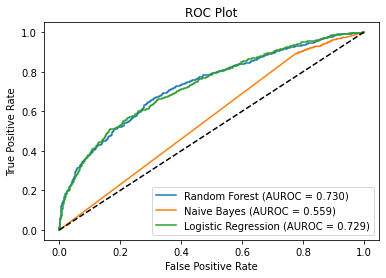

In [266]:
#Plot models.
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show no skill line
plt.plot([0, 1], [0, 1], 'k--')
# Show plot
plt.show()

In [267]:
important_features = pd.Series(data=clf.feature_importances_,index=X.columns)
print(important_features.sort_values(ascending=False,inplace=True))

None


In [268]:
important_features.head(10)

word_count_scaled      0.028042
reading_ease_scaled    0.021959
reissued               0.013932
pitchfork              0.013416
box                    0.010193
today                  0.007668
eligible               0.006406
remastered             0.006317
reissue                0.006313
albums                 0.006059
dtype: float64

**Plot precision and recall curve**

In [273]:
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [274]:
np.where(lr_probs > 0.5, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [275]:
print(classification_report(y_test, np.where(lr_probs > 0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2549
           1       0.52      0.33      0.41       622

    accuracy                           0.81      3171
   macro avg       0.69      0.63      0.65      3171
weighted avg       0.79      0.81      0.79      3171



In [276]:
print(classification_report(y_test, np.where(lr_probs > 0.99, 1, 0)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2549
           1       1.00      0.01      0.03       622

    accuracy                           0.81      3171
   macro avg       0.90      0.51      0.46      3171
weighted avg       0.84      0.81      0.72      3171



In [277]:
# calculate scores
rf_auc = roc_auc_score(y_test, lr_probs)

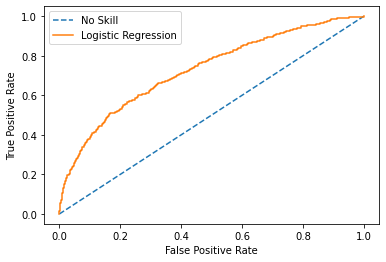

In [278]:
# predict probabilities
yhat = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [279]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [280]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.164024, G-Mean=0.669


In [281]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.208055


In [282]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

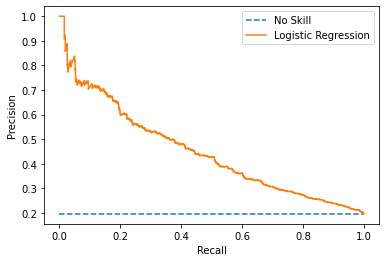

In [283]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [284]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.300308, F-Score=0.465


In [285]:
# predict labels
yhat = lr.predict(X_test)
# evaluate the model
score = f1_score(y_test, yhat)
print('F-Score: %.5f' % score)

F-Score: 0.40591


In [286]:
# predict probabilities
yhat = lr.predict_proba(X_test)

In [287]:
# keep probabilities for the positive outcome only
probs = yhat[:, 1]

In [288]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

In [289]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [290]:
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

In [291]:
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.300, F-Score=0.46436


**Thresholding for balanced accuracy and f-beta.**

In [292]:
def adjust_pred_prob(y_pred_prob, new_threshold):
    """Adjust predicted probabilities to match new threshold value"""
    
    return [1 if y >= new_threshold else 0 for y in y_pred_prob]

In [293]:
lr_clf = lr.predict(X_test)

In [294]:
balanced_accuracy_score(y_test, lr_clf)

0.6289138039127633

In [295]:
accuracy_score(y_test, lr_clf)

0.8098391674550615

In [296]:
fbeta_score(y_test, lr_clf, beta=0.5)

0.4694621695533273

In [297]:
thresholds=np.arange(0,1,.01)

In [298]:
pred_prob_lr_clf = lr.predict_proba(X_test)[:,1]

In [299]:
len(np.unique(pred_prob_lr_clf))

3171

In [300]:
accuracy_points = []

for t in thresholds:
        adjusted_y_pred = adjust_pred_prob(pred_prob_lr_clf, new_threshold=t)
        new_balance = accuracy_score(y_test, adjusted_y_pred)
        accuracy_points.append(new_balance)

In [301]:
balanced_accuracy_points = []

for t in thresholds:
        adjusted_y_pred = adjust_pred_prob(pred_prob_lr_clf, new_threshold=t)
        new_balance = balanced_accuracy_score(y_test, adjusted_y_pred)
        balanced_accuracy_points.append(new_balance)

In [302]:
fbeta_points = []

for t in thresholds:
        adjusted_y_pred = adjust_pred_prob(pred_prob_lr_clf, new_threshold=t)
        new_balance = fbeta_score(y_test, adjusted_y_pred, beta=0.5)
        fbeta_points.append(new_balance)

In [303]:
fbeta_points.index(max(fbeta_points))

50

In [304]:
thresholds[50]

0.5

In [305]:
balanced_accuracy_points.index(max(balanced_accuracy_points))

30

In [306]:
thresholds[30]

0.3

Best threshhold for Precision / Recall Curve 

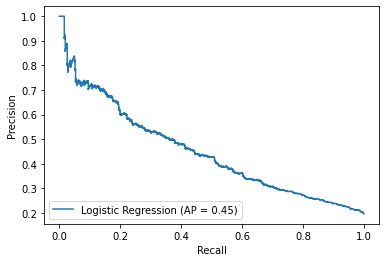

In [307]:
plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')

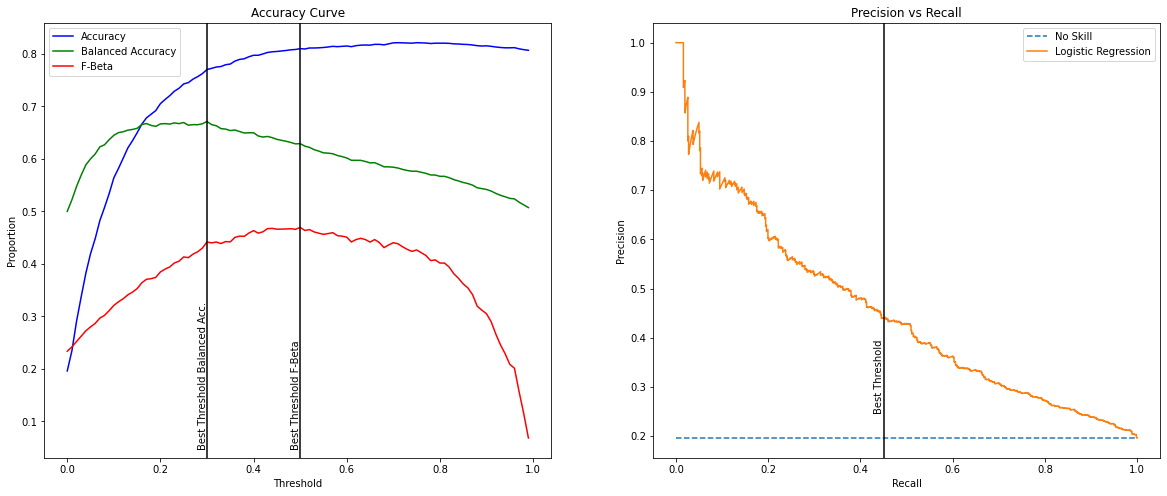

In [308]:
fig, (plt2, plt1) = plt.subplots(1, 2, figsize=(20,8))

#Plot optimal thresholds for f-beta and balanced accuracy
plt2.plot(thresholds, accuracy_points, color='blue')
plt2.plot(thresholds, balanced_accuracy_points, color='green')
plt2.plot(thresholds, fbeta_points, color='red')
plt2.set_title('Accuracy Curve')
plt2.legend(('Accuracy', 'Balanced Accuracy', 'F-Beta'))
plt2.set_xlabel('Threshold')
plt2.axvline(x=.5, color='black')
plt2.text(.48,.05,'Best Threshold F-Beta',rotation=90)
plt2.axvline(x=.30, color='black')
plt2.text(.28,.05,'Best Threshold Balanced Acc.',rotation=90)
plt2.set_ylabel('Proportion')

# plot the precision/recall curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt1.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt1.plot(recall, precision, label='Logistic Regression')
#plt1.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt1.set_title('Precision vs Recall')
plt1.set_xlabel('Recall')
plt1.set_ylabel('Precision')
plt1.legend()
plt1.text(.43,.25,'Best Threshold',rotation=90)
plt1.axvline(x = 0.45, color ='black') 

In [309]:
print(classification_report(y_test, adjust_pred_prob(pred_prob_lr_clf, new_threshold=.45)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2549
           1       0.50      0.36      0.42       622

    accuracy                           0.80      3171
   macro avg       0.68      0.64      0.65      3171
weighted avg       0.79      0.80      0.79      3171



In [310]:
print(classification_report(y_test, adjust_pred_prob(pred_prob_lr_clf, new_threshold=.21)))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      2549
           1       0.36      0.59      0.45       622

    accuracy                           0.71      3171
   macro avg       0.62      0.67      0.63      3171
weighted avg       0.78      0.71      0.74      3171



**Identifying and Analyzing Misclassifications**

In [311]:
y_test_array = np.asarray(y_test)

In [312]:
misclassified = [int(x) for x in [str(x)[1:-1] for x in np.argwhere(y_test_array != base_rf.predict(X_test)).tolist()]]

In [313]:
ind_list = list(df.index)

In [314]:
misclassified[:10]

[0, 6, 7, 10, 20, 24, 35, 37, 43, 48]

In [315]:
l = []
for x in ind_list:
    if x in misclassified:
        l.append(1)
    else:
        l.append(0)
original_df['misclassified'] = l

In [319]:
misclassified_df = original_df[original_df['misclassified']==1]

In [342]:
correct_df = original_df[original_df['misclassified']==0]

In [332]:
misclassified_df.head()

,author,artist,title,genre,date,review_abstract,score,page,target,year,month,self-titled,sophomore,EP,reading_ease,grade_level,word_count,high,misclassified
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,1,medium,2020,September,0,0,0,56.59,11,23,0,1
6,Shannon J. Effinger,Jyoti,"Mama, You Can Bet!",Jazz,2020-09-03,The third installment of Georgia Anne Muldrow’...,8.4,1,high,2020,September,0,0,0,35.61,15,27,1,1
7,Evan Rytlewski,Toots and the Maytals,Got to Be Tough,GlobalRock,2020-09-03,The reggae legend returns in force on his late...,6.5,1,medium,2020,September,0,0,0,42.72,12,20,0,1
10,Owen Myers,Dua LipaThe Blessed Madonna,Club Future Nostalgia,Pop/R&BElectronic,2020-09-02,"Packing 15 producers into 50 minutes, the fun ...",6.9,1,medium,2020,September,0,0,0,41.03,15,30,0,1
20,Rob Arcand,Knot,Knot,Rock,2020-08-31,The former members of Krill return with a slow...,6.9,2,medium,2020,August,1,0,0,63.70,8,32,0,1


In [320]:
misclassified_df.shape

(556, 19)

In [343]:
np.mean(correct_df.score)

7.169896124650447

In [336]:
np.mean(misclassified_df.score)

7.2597122302158255

In [339]:
np.mean(misclassified_df.reading_ease)

48.939604316546784

In [344]:
np.mean(correct_df.reading_ease)

51.23805533359974

In [345]:
a = correct_df['score']
b = misclassified_df['score']

In [346]:
#t-test for scores
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -1.980546868405461
p = 0.04766800579222481


In [347]:
c = correct_df['reading_ease']
d = misclassified_df['reading_ease']

In [348]:
#t-test for reading ease
t2, p2 = stats.ttest_ind(c,d)
print("t = " + str(t2))
print("p = " + str(p2))

t = 3.292167045101579
p = 0.0009974486375497313


In [349]:
e = correct_df['word_count']
f = misclassified_df['word_count']

In [350]:
#t-test for word count
t2, p2 = stats.ttest_ind(e,f)
print("t = " + str(t2))
print("p = " + str(p2))

t = 14.041732641689523
p = 2.1674646683098242e-44
